# Scikit-learn (sklearn) models tutorial

In this tutorial, we will start working with the model fitting API in sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## k-nearest neighbours

We first demonstrate the use of the k-NN algorithm on the Iris dataset.

Recall that this dataset consists of measurements of three different species of irises.

#### Load the dataset

In [4]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

We first split the dataset into a training and validation set with a 80/20 split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

### Build a kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Instantiate a model. n_neighbors is a hyperparameter of the model.
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# The sklearn API uses a .fit() method
knn.fit(X_train, Y_train)

In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
metrics.accuracy_score(Y_test, Y_pred)

Our model has an accuracy score of 90%. This model is quick to fit, so let's try a range of hyperparameter values:

In [ ]:
scores_list = []

In [ ]:
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(Y_test, Y_pred)
    scores_list.append(score)

Plot the accuracy as a function of $k$:

In [ ]:
plt.plot(range(1, 26), scores_list)
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

As we see we have several hyperparameter choices that maximise accuracy. We could choose our optimal hyperparameter as $k=17$.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(iris.data, iris.target)

We can use our trained model to make predictions on new (unseen) data.

In [ ]:
new_data = np.array([[3, 4, 5, 2]])

In [ ]:
classes = iris.target_names
classes

In [ ]:
classes[knn.predict(new_data)]

## Principal components analysis (PCA)

We now demonstrate the use of sklearn for PCA. We begin with a simple synthesised dataset.

#### Create synthetic dataset

In [10]:
P = np.array([[3, 4],
             [1, 0]])

In [11]:
X = np.random.randn(200, 2)
X = np.dot(X, P)
X.shape

(200, 2)

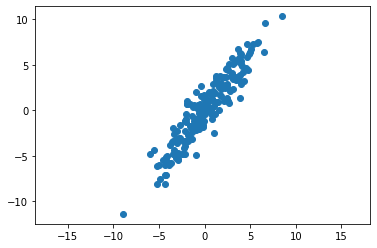

In [12]:
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
plt.show()

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[22.7443699   0.69979172]
[[-0.60076187 -0.79942803]
 [ 0.79942803 -0.60076187]]


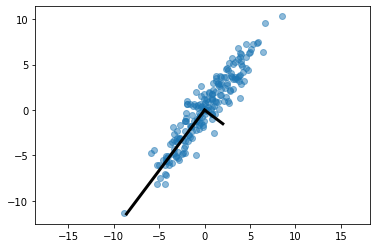

In [14]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

#### Digits dataset

In [5]:
# Load in the `digits` data
digits = datasets.load_digits()

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(digits.data)
print(digits.data.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


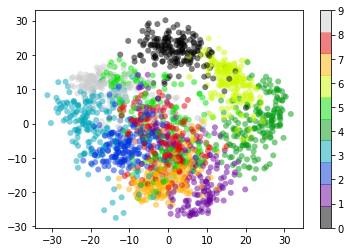

In [16]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

### Explained variance as a function of components

The more components we include, the more variance is explained.

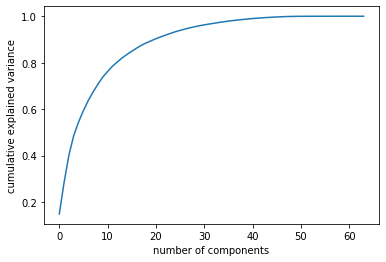

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can see that we lose a lot of information with just 2 components. We would need around 20 components to retain 90% of the variance.

We can also see the data points as coded by an increasing number of principal components:

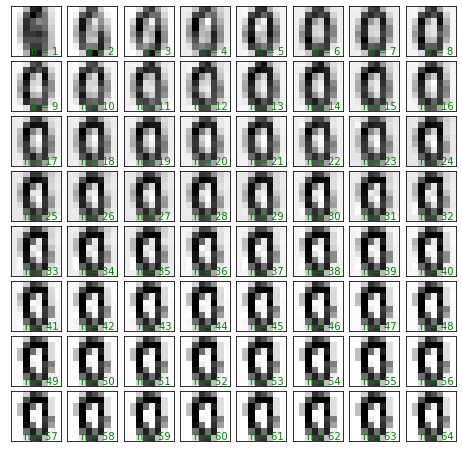

In [18]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(digits.data)
    im = pca.inverse_transform(pca.transform(digits.data[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

## Sklearn estimators API

Sklearn aims to have a consistent API for models (or *estimators*) in its library. Below are methods that appear for different classes of estimators.

* **All models / estimators**
  - `model.fit()`: fits the model to the training data. This method applies to both supervised algorithms (where it accepts two arguments: `model.fit(X, y)`). Unsupervised algorithms accept a single argument: `model.fit(X)`.
* **Supervised algorithms**
  - `model.predict()`: after fitting, a trained model makes a prediction for unseen data `X_test` with this method (`model.predict(X_test)`). 
  - `model.predict_proba()`: Some classifiers have this method available to return the probability of each label for unseen test data.
* **Unsupervised algorithms**
  - `model.predict()`: predict labels in clustering algorithms.
  - `model.transform()`: transforms new data into the new basis: `model.transform(X_test)`.

## Exercise

Explore the use of principal components to perform a kNN classification for the digits dataset. Fit a kNN classifier for a range of $k$ and compare accuracy amongst the models.